# TSIA202a - First Practice Session
The goal of this first practical work is to experiment the estimation of second order moments for
random processes, and to simply compare them with their theoretical version. 

Let consider the following real processes:
-  White Noise (denoted $\text{WN}$) $Z_t$ with variance $\sigma^2$ (use `np.random.normal`)
-  $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$
- $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$ (with $K$ "big enough")
- Harmonic Process: $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])$ (*e.g.* `np.random.uniform`)

For each of them:
1. Compute the theoretical mean and autocovariance of the previous mentioned real processes using the formulas $\mathbb{E}(X_n)$ and $\mathrm{Cov}(X_{n},X_{n+h})$.
2. Compute their empirical mean and empirical autocovariance function using course's formulas in python.
3. Plot the theoretical operator and empirical estimators for various sampling many times and comment.
4. For a given number $ T \in \{10, 100, 500, 1000\}$ of samples $X_1, \dots, X_T$:
  - for a given draw, compute the mean squared error (MSE) $\frac{1}{T}\sum_t (\gamma_{t} - \hat{\gamma_{t}})^2$ between the theoretical and the empirical autocovariance function denoted $\gamma$ and $\hat{\gamma}$ respectively.
  - Repeat the previous step $100$ times and saves all the results.
  - compute the boxplot of the MSE for each $T$ and comment.





In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wn= 3 # sigma 
t=1000

In [3]:
##calcul de l'autocovariance empirique 
def auv(X):
    n=len(X)
    X_cov= np.zeros(n)
    m = np.mean(X)
    for h in range(n):
        X_cov[h]= (1/n) *sum((X[t+h]-m)*(X[t]-m) for t in range(n-h))
    return X_cov



### __White Noise Theoric__

**White Noise  $Z_t$ with variance $\sigma^2$ and means 0**


1- Calcul de la moyenne:  

$$\mathbb{E}(Z_t)=0$$
    
2- Calcul de l'autocovariance  

\begin{align}
\mathrm{Cov}(Z_{t},Z_{t+h})= 0 \quad \text{for }  \;  h \not = 0 \\
\mathrm{Cov}(Z_{t},Z_{t+h}) = \sigma^2 \quad \text{if } \; h=0
\end{align}
    
  
  
  
**Empirical means and autocov below**
    

In [4]:
###White Noise
Z= np.random.normal(0, wn, t) #moyenne 0, écart type wn, t = nombre d'échantillon
M= np.mean(Z) # moyenne empirique de Z
Z_auv= auv(Z)

### **White Noise Theoric 2**

##### $X_t=a+bZ_t+Z_{t-1}$ where $Z_t \sim \text{WN}\left(0,\sigma^2\right)$



1- Calcul de la moyenne:
    $\mathbb{E}(X_t)= a + b*{E}(Z_t) + {E}(Z_t) = a$
    
2- Calcul de l'autocovariance  
* $\mathrm{Cov}(X_{t},X_{t+h})= 0$  if $|h| \geq 1 $  
* $\mathrm{Cov}(Z_{t},Z_{t})=  (1+b^2)*\sigma^2$ if $h = 0 $    
* $\mathrm{Cov}(Z_{t},Z_{t})=  b*\sigma$ if $|h|= 1 $  

  
**Empirical means and autocov below**    

In [5]:
# White Noise Theoric 2 : g(t)= a+ b*Z(t-1) + Z(t)

a= 1
b= 3
def g(t):
    Z= np.random.normal(0, wn, t+1) 
    return  a + b*Z[1:] + Z[:-1]

t=1000
g_th_auv= np.concatenate((np.array([(1+b**2)*wn**2, b*wn**2]), np.zeros(t-2)))
X=g(t)
Xm= (1/t)* sum(X)
X_auv=auv(X)

#pour sigma= 4 et b=3 on a le premier terme = (1+3²)* 4²~160, deuxième terme = 44~(16*3) et troisième terme bcp plus faible 

## **White Noise SUM**

##### $X_t = \sum_{k=0}^{K}2^{-k}Z_{t-k} + a$



#### __1- Calcul de la moyenne:__  

$\mathbb{E}(X_t)= a + \sum_{k=0}^{K}2^{-k}{E}(Z_{t-k}) = a$
    
#### __2- Calcul de l'autocovariance__    
$\mathrm{Cov}(X_{t},X_{t+h}) \, = \, \mathrm{Cov}( \,  \sum_{k=0}^{K}2^{-k}{E}(Z_{t-k}),\, \sum_{i=0}^{K}2^{-i}{E}(Z_{t+h-i}))$ 
  
**therefore,**  
\begin{align*}
\mathrm{Cov}(X_{t},X_{t+h}) &= \sum_{k=0}^{K}\sum_{i=0}^{K}2^{-(k+i)}\, \mathrm{Cov}({E}(Z_{t-k}),{E}(Z_{t+h-i})) \\
&= \sigma ^2 \sum_{k=0}^{K}\sum_{i=0}^{K}2^{-(k+i)}\, \delta_{t-k,t+h-i}  \\
&= \sigma ^2 \sum_{k=0}^{K}2^{-(2*k+h)}\, \delta_{k,i-h} \quad \text{on a nécessairement} & \delta_{k,i-h} \not = 0 \iff i = k+ h \text{ et  } \, | h | \leqslant K\\
&= \sigma ^2* 2^{-h} \sum_{k=0}^{K}4^{-k} \\
&= \sigma ^2* 2^{-h} * \frac{1 - 4^{-(K+1)}}{1 - \frac{1}{4}} \\  
&= \frac{4}{3} * \sigma ^2* 2^{-h} *(1 - \frac{1}{4^{K+1}}) \\
\\
\end{align*}


**Cela tend effectivement pour K grand vers**  
  
  
$$\mathrm{Cov}(X_{t},X_{t+h}) = \begin{cases} 
\frac{4}{3} * \sigma ^2* 2^{-h} \quad \text{pour } | h | \leqslant K  \\
0 \quad \text{sinon}
\end{cases}
$$ 



  
**Empirical means and autocov below**    

In [6]:
##Somme de White Noise f(t)= sum(2^(-k)*Z[k:k-K] for k in range(K))+a

K=100
t=1000
def f(t):
    Z= np.random.normal(0, wn, t+K)
    X= sum(2**(-k)*Z[k:k-K] for k in range(K))+a
    return X

a=4

Y= f(t)
Ym= np.mean(Y)
print(Ym)
Y_auv= auv(Y)
Y_auv

4.032965377656395


array([ 1.22086424e+01,  6.27078708e+00,  3.14990714e+00, ...,
       -1.19220538e-02, -1.00627204e-02, -4.17781928e-03])

## __Harmonic Process__

##### $X_t=A_0\cos(\lambda_0t+\Phi_0)+Z_t$ where $\lambda \in [0,\pi[,$ $\Phi_0 \sim \mathcal{U}([0,2\pi])\\$  
 
### __1- Calcul de la moyenne:__

$\mathbb{E}(X_t)= A_0*\mathbb{E}(\cos(\lambda_0t+\Phi_0)) + Z_t \\ $  


> Calculons l'espérance de  $\cos(\lambda_0t+\Phi_0)$ avec $\Phi_0\sim \mathcal{U}([0,2\pi]) \\$

\begin{align*}
\mathbb{E}[\cos(\lambda_0t+\Phi_0)] &=  \int_{0}^{2\pi}\cos(\lambda_0t+ x) dx\\
&= \frac{1}{2\pi}\left[ \lambda_0t\sin(\lambda_0t+ x)\right]\bigg|_0^{2\pi}\\
&= 0
\end{align*}

et on a également $\mathbb{E}[Z_t]=0\\$  
d'où $$\mathbb{E}(X_t)= 0$$
    
### __2- Calcul de l'autocovariance__

$$\mathrm{Cov}(X_{t},X_{t+h}) \, = \mathrm{Cov}(A_0\cos(\lambda_0t+\Phi_0)+Z_t,A_0\cos(\lambda_0(t+h)+\Phi_0)+Z_{t+h})\\$$

Calculons d'abord : $\mathrm{Cov}(A_0\cos(\lambda_0t+\Phi_0)+Z_t,Z_{t+h})\\$
\begin{align*}
\mathrm{Cov}(X_t, Z_{t+h}) &= \mathrm{Cov}\left(A_0 \cos(\lambda_0 t + \Phi_0) + Z_t, Z_{t+h}\right) \\
&= \mathrm{Cov}\left(A_0 \cos(\lambda_0 t + \Phi_0), Z_{t+h}\right) + \mathrm{Cov}(Z_t, Z_{t+h}) \\
&= \mathrm{Cov}\left(A_0 \cos(\lambda_0 t + \Phi_0), Z_{t+h}\right) + \sigma^2 \delta_{h=0}\\
&= \sigma^2\delta_{h=0} \quad \text{car $Z_t$ est indépendant de $\cos(\lambda_0 t + \Phi_0)$}\\
\end{align*}  

> On a ainsi :

\begin{align*}
\mathrm{Cov}(X_{t},X_{t+h}) &= \sigma^2\delta_{h=0} + A_0^2*\mathrm{Cov}\left(\cos(\lambda_0t+\Phi_0),\cos(\lambda_0(t+h)\Phi_0)\right) \\
&= \sigma^2\delta_{h=0} + A_0^2*\mathbb{E}{\left[\cos(\lambda_0t+\Phi_0)*\cos(\lambda_0(t+h)\Phi_0)\right]} \\
&= \sigma^2\delta_{h=0} + A_0^2*\mathbb{E}{\left[\frac{1}{2}(\cos(\lambda_0t+\Phi_0 +\lambda_0(t+h)\Phi_0)+\cos(\lambda_0h))\right]}\\
&= \sigma^2 \delta_{h=0}+ A_0^2*\mathbb{E}{\left[\frac{1}{2}(\cos(2(\lambda_0t+\Phi_0) +\lambda_0h)+\cos(\lambda_0h))\right]}\\
&= \sigma^2\delta_{h=0} + \frac{A_0^2}{2}*\cos(\lambda_0h) + A_0^2*\mathbb{E}{\left[\frac{1}{2}(\cos((2\lambda_0t +\lambda_0h)+2\Phi_0)\right]}
&= \sigma^2\delta_{h=0} + \frac{A_0^2}{2}*\cos(\lambda_0h)
\end{align*}
**Empirical means and autocov below** 
$\\$



In [7]:
##Harmonic process H(t)= A0 cos(lamb*t + phi0) + Z(t)
lamb = np.pi/8
Ao =5

t=1000

def h(t):
    Z= np.random.normal(0, wn, t)
    phi0= np.random.uniform(0,2*np.pi)
    X= Ao*np.cos(lamb*np.arange(0,t)+phi0) + Z
    return X

W= h(t)
Wm= np.mean(W)
print(Wm)
W_auv= auv(W)
W_auv
def testMean(t):
    for i in range (1,10):
        lamb=  np.pi/i
        print(np.mean(h(t))) 
W_auv

0.031249049777815088


array([ 2.00233231e+01,  1.06573285e+01,  8.31148869e+00,  4.38965164e+00,
        2.58214246e-02, -4.34870059e+00, -7.82962553e+00, -1.06392370e+01,
       -1.10217779e+01, -9.70862888e+00, -7.98882742e+00, -4.18419200e+00,
       -2.30708297e-01,  4.29310165e+00,  8.13519161e+00,  1.02438735e+01,
        1.08730361e+01,  1.01341978e+01,  7.61163755e+00,  4.21234997e+00,
        1.32415655e-01, -4.10241159e+00, -8.02393918e+00, -1.00503965e+01,
       -1.13870644e+01, -1.01729452e+01, -7.71618991e+00, -4.32136702e+00,
       -2.79061323e-01,  4.26381656e+00,  7.67662292e+00,  1.00442659e+01,
        1.10108668e+01,  9.70864168e+00,  7.86938342e+00,  4.17726823e+00,
       -8.67352455e-02, -3.98207726e+00, -7.83225585e+00, -1.03899782e+01,
       -1.06649760e+01, -1.00004594e+01, -7.15199353e+00, -3.79533049e+00,
       -9.86974570e-02,  4.40200775e+00,  7.80002080e+00,  9.60958920e+00,
        1.09759483e+01,  9.90662754e+00,  7.44333946e+00,  3.92989135e+00,
        3.35827648e-02, -

### 3. Plot the theoretical operator and empirical estimators for various sampling many times and comment

Text(0.5, 1.0, ' White Noise')

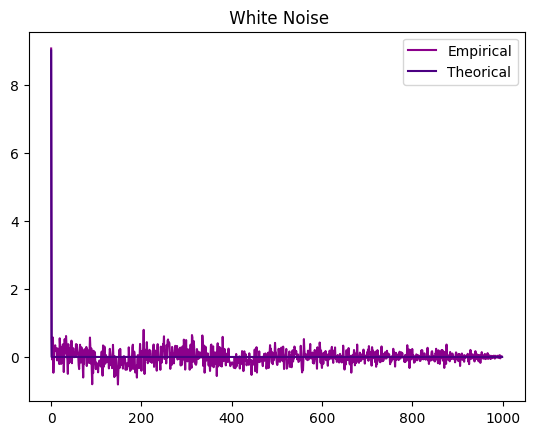

In [8]:
# 3. Plot the theoretical operator and empirical estimators for various sampling many times and comment for  White Noise
plt.plot(np.arange(t), auv(Z), label= 'Empirical', color= 'darkmagenta')
plt.plot(np.arange(t), np.concatenate((np.array([wn**2]), np.zeros(t-1))), label= 'Theorical', color='indigo')
plt.legend( loc= 'best')
plt.title( label=' White Noise')

Text(0.5, 1.0, ' White Noise Theoric 2')

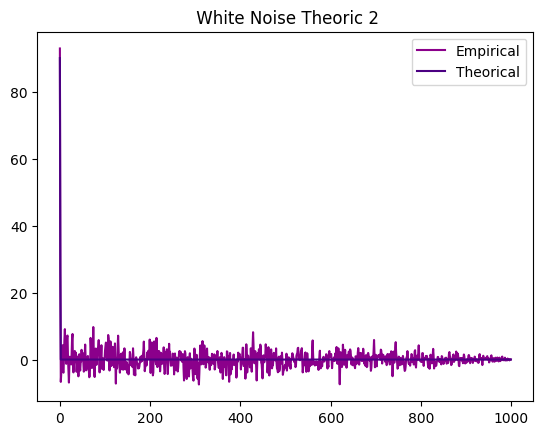

In [9]:
# 3. Plot the theoretical operator and empirical estimators for various sampling many times and comment (for White Noise 2).
plt.plot(np.arange(t), auv(g(t)), label= 'Empirical', color='darkmagenta')
plt.plot(np.arange(t), np.concatenate((np.array([(1+b**2)*wn**2, b*wn**2]), np.zeros(t-2))), label= 'Theorical', color='indigo')
plt.legend( loc= 'best')
plt.title( label=' White Noise Theoric 2')

[1.20000000e+01 6.00000000e+00 3.00000000e+00 1.50000000e+00
 7.50000000e-01 3.75000000e-01 1.87500000e-01 9.37500000e-02
 4.68750000e-02 2.34375000e-02 1.17187500e-02 5.85937500e-03
 2.92968750e-03 1.46484375e-03 7.32421875e-04 3.66210938e-04
 1.83105469e-04 9.15527344e-05 4.57763672e-05 2.28881836e-05
 1.14440918e-05 5.72204590e-06 2.86102295e-06 1.43051147e-06
 7.15255737e-07 3.57627869e-07 1.78813934e-07 8.94069672e-08
 4.47034836e-08 2.23517418e-08 1.11758709e-08 5.58793545e-09
 2.79396772e-09 1.39698386e-09 6.98491931e-10 3.49245965e-10
 1.74622983e-10 8.73114914e-11 4.36557457e-11 2.18278728e-11
 1.09139364e-11 5.45696821e-12 2.72848411e-12 1.36424205e-12
 6.82121026e-13 3.41060513e-13 1.70530257e-13 8.52651283e-14
 4.26325641e-14 2.13162821e-14 1.06581410e-14 5.32907052e-15
 2.66453526e-15 1.33226763e-15 6.66133815e-16 3.33066907e-16
 1.66533454e-16 8.32667268e-17 4.16333634e-17 2.08166817e-17
 1.04083409e-17 5.20417043e-18 2.60208521e-18 1.30104261e-18
 6.50521303e-19 3.252606

Text(0.5, 1.0, ' White Noise Sum ')

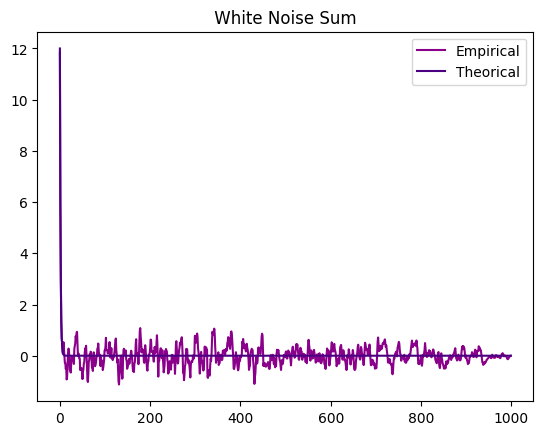

In [ ]:
# 3. Plot the theoretical operator and empirical estimators for various sampling many times and comment. ##White Noise Sum

plt.plot(np.arange(t), auv(f(t)), label= 'Empirical', color='darkmagenta')
A=np.concatenate(([4/3*wn**2*2**(-h) for h in range(K)], np.zeros(t-K)))
plt.plot(np.arange(t), A, label= 'Theorical', color='indigo')
plt.legend( loc= 'best')
plt.title( label=' White Noise Sum ')

Text(0.5, 1.0, ' Harmonic Process')

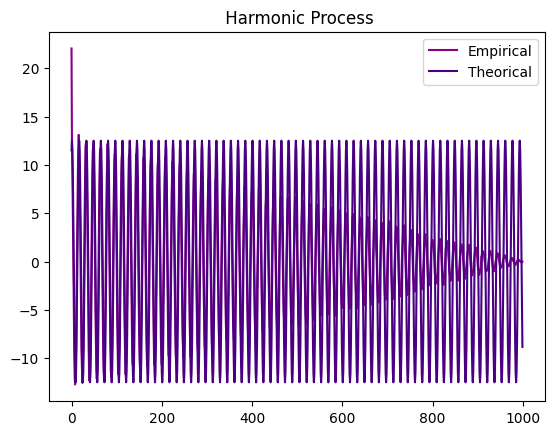

In [11]:
# 4. Plot the theoretical operator and empirical estimators for various sampling many times and comment. ##Harmonic Process
plt.plot(np.arange(t), auv(h(t)), label= 'Empirical', color='darkmagenta')
plt.plot(np.arange(t), np.concatenate((np.array([wn**2+Ao/2]), np.array([1/2*Ao**2*np.cos(lamb*h) for h in range(t-1)]))), label= 'Theorical', color='indigo')
plt.legend( loc= 'best')
plt.title( label=' Harmonic Process')

{'whiskers': [<matplotlib.lines.Line2D at 0x26f3612c8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x26f3612cfd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26f3612c520>,
 'medians': [<matplotlib.lines.Line2D at 0x26f35fb9730>,
 'fliers': [<matplotlib.lines.Line2D at 0x26f35fb9ac0>,
 'means': []}

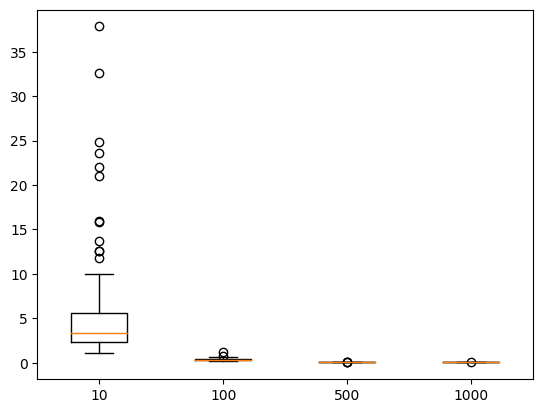

In [ ]:
## calcul MSE pour white noise + boxplot

T= [10,100,500,1000]
MSE= np.zeros((4,100))


for i in range(4):
    th_auv= np.concatenate((np.array([wn**2]), np.zeros(T[i]-1)))
    for j in range(100):
        Z=np.random.normal(0,wn,T[i])
        MSE[i,j]= (1/T[i]) * sum((auv(Z)-th_auv)**2)


plt.boxplot(MSE.T, labels=['10','100','500', '1000'])
#rajouter title, les labels et les legendes + couleurs

{'whiskers': [<matplotlib.lines.Line2D at 0x26f36065040>,
 'caps': [<matplotlib.lines.Line2D at 0x26f36065760>,
 'boxes': [<matplotlib.lines.Line2D at 0x26f36053c70>,
 'medians': [<matplotlib.lines.Line2D at 0x26f36065e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x26f3606e250>,
 'means': []}

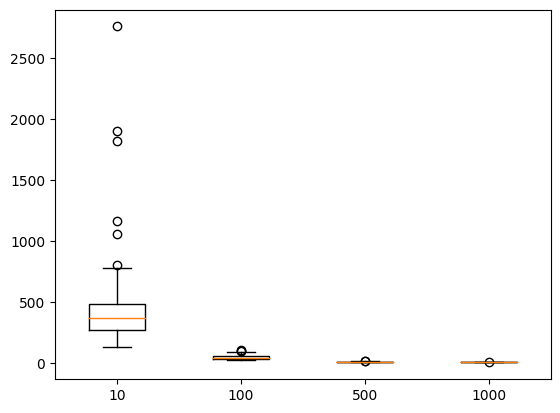

In [ ]:
## calcul MSE pour white noise 2  + boxplot

T= [10,100,500,1000]
MSE2= np.zeros((4,100))


for i in range(4):
    th_auv= np.concatenate((np.array([(1+b**2)*wn**2, b*wn**2]), np.zeros(T[i]-2)))
    for j in range(100):
        X = g(T[i])
        MSE2[i,j]= (1/T[i]) * sum((auv(X)-th_auv)**2)

plt.boxplot(MSE2.T, labels=['10','100','500', '1000'])

In [ ]:
## calcul MSE pour white noise  sum + boxplot 

In [ ]:
## calcul MSE pour harminic process + boxplot


## Analyse des Résultats 

**Plus  l'échantillon est grand, plus la moyenne des écarts aux carrés tend vers 0**
